In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# open cv
import cv2
# os

import os
import pathlib

# warnigns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print(f"NumPy Version: {np.__version__}")

NumPy Version: 1.26.4


## Dataset Creation:

We've taken reference from kaggle datset of [cats and dogs](https://www.kaggle.com/c/dogs-vs-cats) which consists of over 25000 jpegs of cats and dogs. For our project purpose, we take a slice of this dataset by defining a parameter `number_of_examples_train (no_of_ex)` which considers equal number of each category, i.e., the train dataset consists of `no_of_ex` cats and `no_of_ex` dogs. We've downloaded entire dataset from kaggle and we've two folders in our current directory, namely `train` and `test`.

In [2]:
# defining number of examples to be 1500
number_of_examples_train = 300
test_set_number_of_examples = 100

In [3]:
curr_path = os.getcwd()
train_path = os.path.join(curr_path,"train")
train_path

'/Users/sumanthpalla/Desktop/learn/deep_learning/projects/cats_and_dogs/dogs-vs-cats/train'

In [4]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)

In [5]:
import time
def load_dataset(mode = "train"):
    """
    Iterates over each image in train and creates two tensors X and y which consists of Images and Labels. Images are resized into
    (64,64,3) RGB. Accepts two modes. mode = "train" creates Training Images and Labels and mode = "test" creates Transformed Test Images

    Args:
    mode: "train" or "test"

    returns:
    training_images, training_labels if mode is train or testing_images
    """
    start_time = time.time()
    if mode == "train":
        training_images = []
        training_labels = []
    else:
        testing_images = []
        ids = []
    main_dir = os.getcwd()
    mode_dir = mode
    path = os.path.join(main_dir,mode_dir)
    convert_into_label = lambda  category: int(category == 'dog') # return 1
    if mode == "train":
        for file in os.listdir(path):
            category = file.split(".")[0]
            category = convert_into_label(category)
            img_array = cv2.imread(os.path.join(path,file))
            new_size = (128,128)
            new_img_array = cv2.resize(img_array,new_size)
            training_images.append(new_img_array)
            training_labels.append(category)
    else:
        for file in os.listdir(path):
            id = file.split(".")[0]
            img_array = cv2.imread(os.path.join(path,file))
            new_size = (128,128)
            new_img_array = cv2.resize(img_array,new_size)
            testing_images.append(new_img_array)
            ids.append(id)
    end_time = time.time()
    length = end_time - start_time
    print(f"load_dataset in {mode}mode took {length:.3f}s")
    if "test" in mode:
        return np.array(testing_images),np.array(ids)
    return np.array(training_images), np.array(training_labels)

In [6]:
X_train,y_train = load_dataset(mode="train")

load_dataset in trainmode took 18.479s


In [7]:
classes = {0:"cat",1:"dog"}

It's a cat picture.


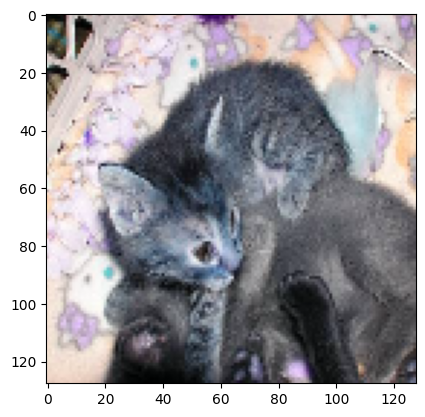

In [8]:
# Example of a picture
index = 10
plt.imshow(X_train[index])
print(f"It's a {classes[y_train[index]]} picture.")

load_dataset in test1mode took 9.431s


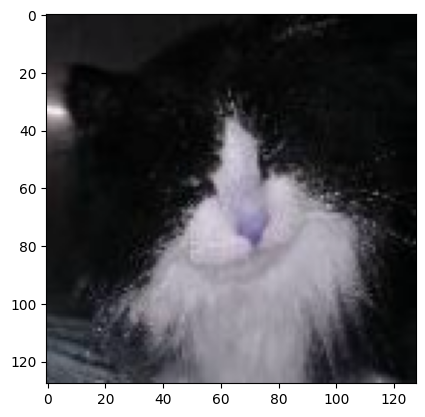

In [9]:
test_set, ids  = load_dataset(mode="test1")

index = 20
plt.imshow(test_set[index])

In [10]:
X_train[0].shape

(128, 128, 3)

In [11]:
len(test_set)

12500

We're having 25000 images of (128,128,3) shape. To train these many images on L-layer NN can take significant amount of time. Hence, we'll make a small set out of this to train on a L-layer NN. For our mere understanding on how backpropagation works, how to initialize parameters of L-layer Neural Network, we consider number of training examples to be 300 which is formed from a random shuffle of original train data (X_train and y_train).

<Axes: xlabel='None', ylabel='count'>

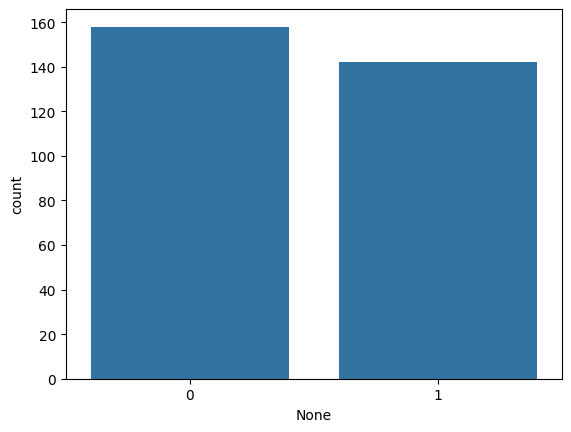

In [12]:
import pandas as pd
# setting up seed to make the shuffle same every time we run
np.random.seed(14)

# get random indices of length 300 which ranges from 1 to 25000
random_indices = np.random.randint(25000,size = 300)

# preparing new train dataset
X_train_new = [X_train[random_index] for random_index in random_indices]
y_train_new = [y_train[random_index] for random_index in random_indices]

# creating a plot about the distribution of dogs and cats

sns.countplot(x = pd.Series(y_train_new))

In [13]:
# create new_test_dataset from X_train so that we know the labels, make sure we don't include the indices in random_indices
available_indices = [index for index in range(25000) if index not in random_indices]
test_random_indices = np.random.randint(len(available_indices),size = 100)
X_test_new = [X_train[available_indices[index]] for index in test_random_indices]
y_test_new = [y_train[available_indices[index]] for index in test_random_indices]

In [14]:
X_train_new = np.array(X_train_new)
y_train_new = np.array(y_train_new)
X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

In [15]:
# Explore your dataset 
m_train = X_train_new.shape[0]
num_px = X_train_new.shape[1]
m_test = X_test_new.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("X_train shape: " + str(X_train_new.shape))
print ("y_train shape: " + str(y_train_new.shape))
print ("X_test shape: " + str(X_test_new.shape))
print ("y_test shape: " + str(y_test_new.shape))

Number of training examples: 300
Number of testing examples: 100
Each image is of size: (128, 128, 3)
X_train shape: (300, 128, 128, 3)
y_train shape: (300,)
X_test shape: (100, 128, 128, 3)
y_test shape: (100,)


## Feature Engineering Pipeline

Feature Engineering in Deep Neural Networks includes Flattening, Standardizing of Feature Values between 0 and 1 (to make sure Optimization Algorithms like Gradient Descent, Batch Gradient Descent to converge faster and minimize the loss)

In [16]:
# Reshape the training and test examples 

# made the x_train_flatten to be having a shape of (n_x,m)
X_train_flatten = X_train_new.reshape(X_train_new.shape[0],-1).T   # The "-1" makes reshape flatten the remaining dimensions
X_test_flatten = X_test_new.reshape(X_test_new.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
X_train_new = X_train_flatten/255.
X_test_new = X_test_flatten/255.

print ("train_x's shape: " + str(X_train_new.shape))
print ("test_x's shape: " + str(X_test_new.shape))

train_x's shape: (49152, 300)
test_x's shape: (49152, 100)


## Designing Architecture:

A L-layer Neural Network (or a Deep Neural Network) consists of more than 2-layers in which layers are stack on one another to classify the given data. In this project, we'll define a five layer neural network with number of hidden layers as layers = [49152, 64, 32, 16, 4, 1] and use stochastic gradient descent algorithm to update the weights. At its core a Deep Neural Network works on below Algorithm:
```
parameters =  initialize_parameters_deep (layers)
for iteration = 1 to number of iterations:
    perform forward propagation
    compute costs
    compute the grads using backpropagation
    update the grads using optimization algorithm
    print cost / loss for specific iteration (for epoch = 100 or so)
        append the costs for specific epoc for plotting loss / accuracy curves
```
- Initialize the parameters for an $L$-layer neural network
- Implement the forward propagation module (shown in purple in the figure below)
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - The ACTIVATION function is provided for you (relu/sigmoid)
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function.
- Compute the loss
- Implement the backward propagation module (denoted in red in the figure below)
    - Complete the LINEAR part of a layer's backward propagation step
    - The gradient of the ACTIVATION function is provided for you(relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally, update the parameters

<img src = "final outline.png">

<center><cite>Deep Learning Specialization, Coursera </cite></center>

In [17]:
# parameters dict to store each weights and bias
# for example parameters[w1] gives a vector which has weights between layer 1 and layer 0 and parameters[w2] has weights between layer 2 
# layer 1

# defining layers which consists of number of hidden neurons

layer_dims =[X_train_new.shape[0], 64, 32, 16,4,1]

def initialize_parameters_deep(layer_dims):
    """
    Initializes Weights as per He Initialization / Kaiming Initialization given by W ~ N(0, 2/n^l) where n^l represents the number of neurons
    in current layer

    Arguements:
    layer_dims: A List:[int] which consists of number of neurons in each layer
    Returns
    parameters: A dictionary of parameters such as "W1","b1","W2","b2","W3","b3",...."WL","bL"
                Wl has a shape of (layer_dims[l], layer_dims[l-1])
                bl has a shape of (layer_dims[l],1)
    """
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)
    for layer in range(1,L):
        parameters["W"+ str(layer)] = np.random.randn(layer_dims[layer],layer_dims[layer-1])*np.sqrt(2/layer_dims[layer-1])
        parameters["b"+str(layer)] = np.zeros((layer_dims[layer],1))
    return parameters
parameters = initialize_parameters_deep(layer_dims)

In [18]:
# print shapes of parameters

for key,value in parameters.items():
    print(f"{key} shape: {value.shape}",sep='\n')

W1 shape: (64, 49152)
b1 shape: (64, 1)
W2 shape: (32, 64)
b2 shape: (32, 1)
W3 shape: (16, 32)
b3 shape: (16, 1)
W4 shape: (4, 16)
b4 shape: (4, 1)
W5 shape: (1, 4)
b5 shape: (1, 1)


### Forward Propagation: 

For a layer l, we perform the forward propagation by 

$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} \tag{1}$$
the equation ${1}$ will be computed by `linear_forward` function.
$$ A^{[l]} = g(Z^{[l]}) = ReLU(Z^{[l]}) \; \text{or} \; sigmoid(Z^{[l]})\tag{2}$$
the equation ${2}$ will be computed by `linear_forward_activation` function.

$\text{sigmoid}(Z^{[l]})$ is calculated by `sigmoid (Z)` which returns $A^{[L]}$ and cache which consists of $Z^{[L]}$ <br>
$\text{ReLU}(Z^{[l]})$ is calculated by `relu (Z)` which returns $A^{[L]}$ and cache which consists of $Z^{[L]}$ 

In [19]:
def sigmoid(Z):
    """
    Performs sigmoid function on a numpy array Z

    Arguments:

    Z: a numpy array

    Returns:

    A: Activation of Z which is sigmoid (Z) and cache (which can be used for backpropagation). Here cache is Z
    A,cache
    """
    A = np.exp(Z) / (1 + np.exp(Z))
    cache = Z
    return A, cache

def relu(Z):
    """
    Performs ReLU function on a numpy array Z

    Arguments:

    Z: a numpy array

    Returns:

    A: Activation of Z which is (Z) and cache (which can be used for backpropagation). Here cache is Z

    A,cache
    """
    A = np.maximum(0,Z)
    cache = Z
    return A, cache
def linear_forward(A,W,b):
    """
    Computes Linear Part of Forward Propagation

    Arguments:

    A: Activation of previous layer
    W: Weight of current layer
    b: bias of current layer

    Returns:
    Z -- the linear combination of input with weights
    cache - essentially A and b which can be later used for backpropagation
    """
    Z = W.dot(A) + b
    assert(Z.shape == (W.shape[0],A.shape[1]))
    cache = (A,W,b)
    return Z, cache

def linear_forward_activation(A_prev,W,b,activation):
    """
    Computes Linear + Activation Part of Forward Propagation

    Arguments:
    A: Activation of previous layer
    W: Weight of current layer
    b: bias of current layer
    activation: can be "relu" or "sigmoid"

    Returns:
    A -- Activation calculated for current layer using A_prev, W,b and activation
    cache - a tuple of (A_prev, W,b) which can be later used for backpropagation

    """
    if activation == "relu":
        Z,linear_cache = linear_forward(A_prev,W,b) # linear_cache contains A_prev, W, b
        A,activation_cache = relu(Z) # activation_cache contains Z
    else:
        Z,linear_cache = linear_forward(A_prev,W,b) # linear_cache contains A_prev, W, b
        A,activation_cache = sigmoid(Z) # activation_cache contains Z
    cache = (linear_cache,activation_cache) # ((A,W,b),Z)
    # pack linear_cache, activation_cache so that we have every variable that can be used in backpropagation
    return A, cache

In [20]:
# writing L - Layer Forward function

def L_Layer_forward(X,parameters):
    """
    Computes Linear - ReLU Activation Propagation for L-1 layers and Linear - Sigmoid for Lth Layer 

    Arguments:

    X: Input Data (assumed as layer 0)
    parameters: weights and biases dictionary

    Returns:
    AL -- Activation at Lth Layer
    caches -- A list of (linear_cache,activation_cache) at each layer.
    """
    caches = []
    A = X
    # number of layers
    L = len(parameters)//2
    for layer in range(1,L):
        # activation is relu
        A,cache = linear_forward_activation(A,parameters["W"+str(layer)],parameters["b"+str(layer)],activation="relu")
        caches.append(cache)
    # last layer activation is relu
    AL,cache = linear_forward_activation(A,parameters["W"+str(L)],parameters["b"+str(L)],activation="sigmoid")
    caches.append(cache)
    return AL, caches
AL,caches = L_Layer_forward(X_train_new,parameters)

In [21]:
AL.shape, X_train_new.shape, y_train_new.shape

((1, 300), (49152, 300), (300,))

### Computing Cost:


For a binary classification, we define the loss function as Binary Cross Entropy Loss (BCE) which is defined as below. 

$$ loss = - (y* np.log(A^{[l]}) + (1-y)*np.log(1 - A^{[l]})) \tag{3}$$


The cost function, J is defined as the average of loss function for the entire set. 

$$ J = \Sigma {loss} / (m) \tag{4}$$


```python
log_probs = y*np.log(AL) + (1-y)*np.log(1-AL)
cost = -np.sum(log_probs,keepdims=True)/m
cost = np.squeeze(cost)

```

Q: what's the difference between loss function and cost function?
A: Loss is calculated as the error between true label/value and calculated label/value. Cost function is calculated as the average of all loss functions over training examples.





In [22]:
# compute binary cross entropy loss between AL and Y

def compute_cost(AL,y):
    """
    Computes Binary Cross Entropy Loss between AL and y

    Arguments:
    AL: Activation of Lth Layer
    y: true label

    Return:
    Binary Cross Entropy Loss
    """
    try:
        assert(AL.shape == y.shape)
    except AssertionError:
        y = y.reshape(AL.shape[0],AL.shape[1])
    # number of examples
    m = y.shape[1]
    # computing loss
    log_probs = y*np.log(AL) + (1-y)*np.log(1-AL)
    cost = -np.sum(log_probs,keepdims=True)/m
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return cost

compute_cost(AL,y_train_new)

array(0.73786604)

### Backward Propagation:

Backward Propagation is used to calculate gradients of parameters with respect to Cost function. For a layer l, the forward and backward propagation are described below.

Consider a layer l, for which we computed, $A^{[l]}$ and other variables such as $Z^{[l]}, A^{[l-1]}, b^{[l]}$ are available through caches. Now to find gradients for the current layer, namely $dW^{[l]}$, $db^{[l]}$, we make use of **Chain Rule** and **Differentiation of functions**. Below are the equations that are used to calculate the respective gradients, $dZ^{[l]},dA^{[l-1]}, dW^{[l]},db^{[l]}$. At first, we compute 

$$dA^{[L]} = \frac{\partial J}{\partial A^{[L]}} = - (\frac{y}{A^{[L]}}  - \frac{1-y}{1-A^{[L]}}) \tag{5}$$

the above computation is done in `L_model_backward` function. Now we calculate $dZ^{[L]}$ through **chain rule** described below.
$$dZ^{[L]} = \frac{\partial J}{\partial Z^{[L]}} = \frac{\partial J}{\partial A^{[L]}}* \frac{\partial A^{[L]}}{\partial Z^{[L]}} = dA^{[L]} * \frac{\partial A^{[L]}}{\partial Z^{[L]}}  = dA^{[L]} * g'(Z)\tag{6}$$

$g'(Z)$ is computed through either `sigmoid_backward` or `relu_backward` function.

Now using $dZ^{[L]}$, we can calculate, $dA^{[L-1]}, dW^{[L]}, db^{[L]}$ using the below equations

$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{6}$$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{7}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{8}$$


$A^{[l-1] T}$ is the transpose of $A^{[l-1]}$. 

**Note**: $dZ^{[L]}, dA^{[L-1]}, dW^{[L]}, db^{[L]}$ needs to be same shape of $Z^{[L]},A^{[L-1]}, W^{[L]}, b^{[L]}$

In [23]:
def sigmoid_backward(dA,activation_cache):
    """
    calculates dZ, using dA and activation_cache. 
    Here activation_cache is equivalent to cache given by sigmoid(Z) function, which is indeed Z
    activation_cache = Z.
    Arguements:
    dA: Activation of layer l
    activation_cache: equals to Z
    Returns:
    dZ: gradient of Z, which can later be used in calculation of dW, db
    """
    Z = activation_cache
    # dZ = dA * g'(Z) (element wise multiplication)
    # here g'(Z) = g(Z) * (1-g(Z))
    g_z = np.exp(Z)/ (1 + np.exp(Z)) # sigmoid function
    d_gz = g_z * (1 - g_z) # d_gz = g'(z) = g(z) * (1-g(z))
    dZ = dA * d_gz
    assert(dZ.shape == Z.shape)
    return dZ
def relu_backward(dA,activation_cache):
    """
    calculates dZ, using dA and activation_cache. 
    Here activation_cache is equivalent to cache given by relu(Z) function, which is indeed Z
    activation_cache = Z.
    Arguements:
    dA: Activation of layer l
    activation_cache: equals to Z
    Returns:
    dZ: gradient of Z, which can later be used in calculation of dW, db
    """
    Z = activation_cache
    # dZ = dA * g'(Z)
    # here g'(Z) = 1 for z > 0 and g'(Z) = 0 for z <= 0
    # dZ = dA for Z > 0
    dZ = np.copy(dA)
    dZ = np.where(Z <= 0, 0,dZ)
    assert(dZ.shape == Z.shape)
    return dZ

# using dZ to calculate dW, db and dA^{[l-1]}

def linear_backward(dZ,linear_cache):
    """
    Implement backpropagation for a single layer l
    Arguments:
    dZ: derivative of cost with respect to Z (dJ/dZ)
    linear_cache: consists of tuple of (A_prev,W,b). this is the output of linear_forward function which gives Z and (A_prev,W,b)
    Returns:
    dA_prev: derivative of cost with respect to A_prev, same shape as A_prev
    dW: derivative of cost with respect to W, same shape as W
    db: derivative of cost with respect to b, same shape as b
    """
    A_prev,W,b = linear_cache
    # A_prev is of shape (layer[l-1],m), W is of shape (layer[l], layer[l-1]), b is of shape (layer[l],1)
    # dZ is of same shape as Z, which is (layer[l],m)
    # number of examples
    m = A_prev.shape[1]
    # calculation of dA_prev, dW, db
    dA_prev = np.dot(W.T,dZ)
    dW = np.dot(dZ,A_prev.T)*(1./m)
    db = np.sum(dZ,axis = 1,keepdims=True)*(1./m) # perform summation along the row, i.e, consider a single feature addition among all examples
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dA_prev, dW, db

def linear_activation_backward(dA,cache,activation):
    """
    Implement backpropagation for a linear->activation layer
    Arguments:
    dZ: derivative of cost with respect to Z (dJ/dZ), same shape as Z
    cache: consists of tuple of (linear_cache,activation_cache). this is the output of linear_forward function which gives Z and (A_prev,W,b)
    Returns:
    dA_prev: derivative of cost with respect to A_prev, same shape as A_prev
    dW: derivative of cost with respect to W, same shape as W
    db: derivative of cost with respect to b, same shape as b
    """
    linear_cache, activation_cache = cache
    if activation=='relu':
        #compute dZ from relu_backward
        dZ = relu_backward(dA,activation_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA,activation_cache)
    else:
        print(f"Please enter correct activation parameter!, you have entered {activation}, which has to be either relu or sigmoid")
    # compute dA_prev, dW, db from dZ using linear_backward
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

# using the above functions, we iterate through each layer and calculate gradients dW, db through L_model_backward function

def L_model_backward(AL,y,caches):
    """
    Implements backpropagation for given Neural Network

    Arguments:
    AL: Activation for last layer
    Y: true labels equivalent to y_train
    caches: A list of (linear_cache,activation_cache) for each layer

    Returns:
    grads: A dictionary which consists of dA,dW, db for each layer, i.e., grads["W1"] consists of gradient for W1
    """
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    # initialize backpropagation
    # compute dAL for the last layer
    assert(AL.shape == y.shape)
    dAL = -(np.divide(y,AL) - np.divide(1-y,(1-AL)))
    # compute dZL for the last layer
    cache_L = caches[L-1]
    dA_prev,dW,db = linear_activation_backward(dAL,cache_L,activation="sigmoid")
    grads["dA"+str(L-1)],grads["dW"+str(L)],grads["db"+str(L)] = dA_prev,dW,db
    # compute grads for penultimate layer to the first layer
    for l in reversed(range(L-1)):
        # lth layer contains relu activation function
        grads["dA"+str(l)],grads["dW"+str(l+1)],grads["db"+str(l+1)] = linear_activation_backward(grads["dA"+str(l+1)],caches[l],activation="relu")
    return grads


### Updating Parameters:

### Gradient Descent

Gradient descent is an optimization algorithm used to minimize the error of a function by iteratively adjusting its parameters. In the context of machine learning, gradient descent is often used to train models by adjusting the weights and biases of a neural network.

The update rules for gradient descent are as follows:

1. **Weights (W)**: The weights are updated using the following formula:

   $$
   W = W - \alpha \frac{\partial J}{\partial W}
   $$

   where:
   - `W` is the matrix of weights
   - `α` (alpha) is the learning rate, which determines the size of the steps taken during each iteration
   - `J` is the cost function, which measures the difference between the predicted output and the actual output
   - `∂J/∂W` is the gradient of the cost function with respect to the weights

2. **Bias (b)**: The bias is updated using the following formula:

   $$
   b = b - \alpha \frac{\partial J}{\partial b}
   $$

   where:
   - `b` is the vector of biases
   - `α` (alpha) is the learning rate
   - `J` is the cost function
   - `∂J/∂b` is the gradient of the cost function with respect to the biases

The update rules for the weights and biases are applied simultaneously, and the algorithm iterates over the training data multiple times (epochs) until convergence or until a maximum number of iterations is reached. The goal of gradient descent is to find the values of the weights and biases that minimize the cost function and produce the best possible predictions.



In [24]:
def update_parameters(parameters,grads,learning_rate):
    """
    Updates Weights by Gradient Descent Algorithm;
    Arguments:
    parameters: a dictionary of weights and biases
    grads: a dictionary of grads of weights and biases
    learning_rate: a parameter that can be used to update the 
    returns:
    parameters: a dictionary of weights and biases with updated parameters
    """
    L = len(parameters)//2
    for l in range(1,L+1):
        parameters["W" + str(l)] -= learning_rate*grads["dW"+str(l)]
        parameters["b" + str(l)] -= learning_rate*grads["db"+str(l)]
    return parameters

### Predictions 

convert probs from layer AL to predictions using a threshold (probs >0.5) = 1 else 0

In [25]:
def predict(X,y,parameters):
    """
    This function is used to predict the results of a  L-layer neural network. Along with predictions, it prints accuracy
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    L = len(parameters)//2
    probs,caches = L_Layer_forward(X,parameters)
    try:
        assert (probs.shape == y.shape)
    except AssertionError:
        y = y.reshape(probs.shape[0],probs.shape[1])
    m = probs.shape[1]
    predictions = np.where(probs > 0.5,1,0)
    print("Accuracy: " + str(np.sum(predictions == y)/m))
    return predictions
    

### Model: 

Combining the functions used above to design a model function which runs over `X_train_new` and `y_train_new` to print training accuracy and test accuracy

In [26]:
def L_layer_model(X,y,layer_dims, learning_rate = 0.01, num_iterations = 5000, print_cost = False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if dog), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    # reshape y if not in the format of (1, number of examples)
    try:
        assert(y.shape == (1,X.shape[1]))
    except AssertionError:
        y = y.reshape(1,X.shape[1])
    # keeping random seed
    np.random.seed(14)
    costs = []
    # initialize parameters
    parameters = initialize_parameters_deep(layer_dims)
    for epoch in range(num_iterations):
        # perform forward propagation 
        AL,caches = L_Layer_forward(X,parameters)
        # compute cost
        cost = compute_cost(AL,y)
        # perform backpropagation
        grads = L_model_backward(AL,y,caches)
        # perform optimization
        parameters = update_parameters(parameters,grads,learning_rate=learning_rate)
        # print costs
        if epoch%100 == 0 or epoch == num_iterations - 1:
            print(f"Cost after iteration {epoch}: {np.squeeze(cost)}")
        if epoch%100 == 0:
            costs.append(np.squeeze(cost))
    return parameters,costs
        

In [27]:
X_train_new.shape, y_train_new.shape, layer_dims

((49152, 300), (300,), [49152, 64, 32, 16, 4, 1])

### Training

In [28]:
parameters, costs = L_layer_model(X_train_new,y_train_new,layer_dims, num_iterations = 5000, print_cost = True)

Cost after iteration 0: 0.7378660446076322
Cost after iteration 100: 0.6921751644107146
Cost after iteration 200: 0.691204723450086
Cost after iteration 300: 0.687411469316224
Cost after iteration 400: 0.680748812993932
Cost after iteration 500: 0.6156598351962973
Cost after iteration 600: 0.6880485284855514
Cost after iteration 700: 0.6003982593211292
Cost after iteration 800: 0.5736180060665669
Cost after iteration 900: 0.598766110148919
Cost after iteration 1000: 0.5789763237520674
Cost after iteration 1100: 0.3975597399242991
Cost after iteration 1200: 0.5679075434952762
Cost after iteration 1300: 0.48899165992811183
Cost after iteration 1400: 0.363239194842434
Cost after iteration 1500: 0.29213342437779144
Cost after iteration 1600: 0.24249583943657713
Cost after iteration 1700: 0.25213908953496156
Cost after iteration 1800: 0.18327612839713184
Cost after iteration 1900: 0.16324450028239232
Cost after iteration 2000: 0.1476473729732528
Cost after iteration 2100: 0.1347648578065113

Text(0.5, 1.0, 'Training Loss Curve')

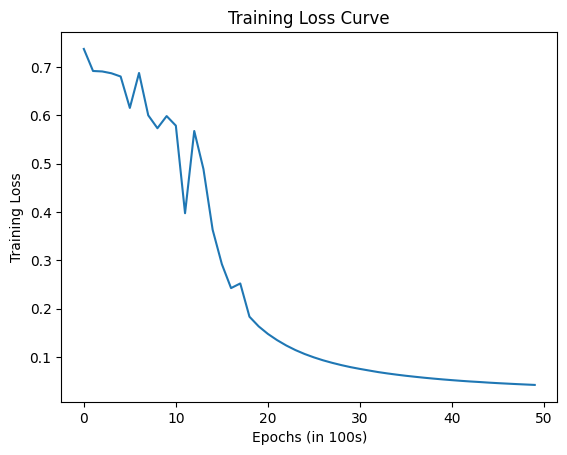

In [32]:
plt.plot(costs)
plt.xlabel("Epochs (in 100s)")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve")

In [30]:
train_accuracy = predict(X_train_new,y_train_new,parameters = parameters)

Accuracy: 0.9966666666666667


In [31]:
test_accuracy = predict(X_test_new,y_test_new,parameters=parameters)

Accuracy: 0.61
